In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Collection and Preprocessing

In [2]:
df = pd.read_csv("loan_dataset.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df2 = df.dropna()

In [9]:
df2.shape

(480, 13)

In [10]:
df2["Loan_Status"].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [11]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)

In [12]:
df["Loan_Amount_Term"].isnull().sum()

0

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Visualization

<Axes: xlabel='Education', ylabel='count'>

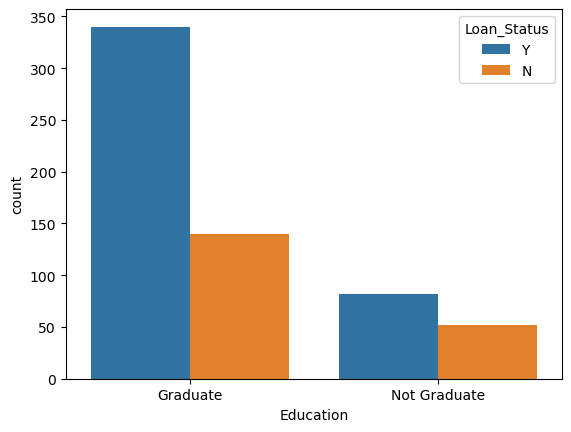

In [14]:
# Ensure Loan_Status is of type string
df["Loan_Status"] = df["Loan_Status"].astype(str)

# Now plot the countplot
sns.countplot(x="Education", hue="Loan_Status", data=df)

<Axes: xlabel='Married', ylabel='count'>

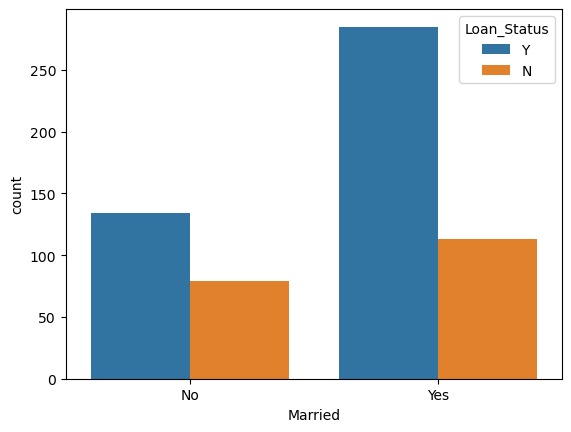

In [15]:
sns.countplot(x = "Married",hue="Loan_Status", data=df)

<Axes: xlabel='Gender', ylabel='count'>

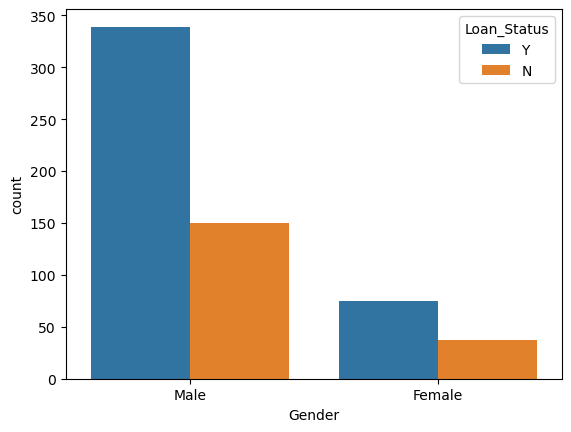

In [16]:
sns.countplot(x = "Gender",hue="Loan_Status", data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

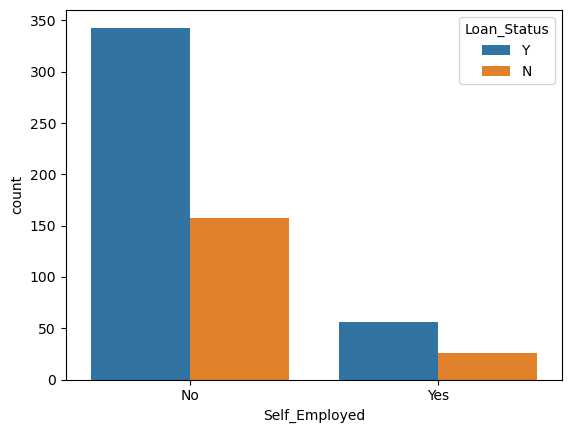

In [17]:
sns.countplot(x = "Self_Employed",hue="Loan_Status", data=df)

# Label Encoding

In [18]:
Loan_Status_Labels = {"Y":1,"N":0}

# encoding the values in Loan_Status column
df["Loan_Status"] = df["Loan_Status"].map(Loan_Status_Labels)

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [20]:
# Label Encoding the categorical Columns

df.replace({"Married":{"No":0,"Yes":1},"Gender":{"Male":1,"Female":0},
            "Self_Employed":{"No":0,"Yes":1},"Property_Area":{"Rural":0,"Semiurban":1,"Urban":2},
           "Education":{"Graduate":1,"Not Graduate":0}},inplace = True)

In [21]:
df = df.replace(to_replace="3+",value = 4)

# Handling Missinng Values

In [22]:
df["Dependents"].value_counts()

Dependents
0    345
1    102
2    101
4     51
Name: count, dtype: int64

In [23]:
df["Dependents"].fillna(0,inplace = True)

In [24]:
df["Dependents"].isnull().sum()

0

In [25]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace = True)

In [26]:
df["LoanAmount"].isnull().sum()

0

In [27]:
df3 = df.dropna()

In [28]:
df3.shape

(523, 13)

In [29]:
df3["Loan_Status"].value_counts()

Loan_Status
1    353
0    170
Name: count, dtype: int64

In [30]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
df3 = df.dropna()

In [32]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [33]:
df3.shape

(523, 13)

# Splitting the data

In [34]:
X = df3.drop(columns = ["Loan_ID","Loan_Status"],axis = 1)  # Loan_ID column is useless
Y = df3["Loan_Status"]

# Train Test Split

In [35]:
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,stratify = Y,test_size = 0.2,random_state = 2)

In [36]:
print(X_train.shape,X_test.shape,X.shape)

(418, 11) (105, 11) (523, 11)


# Training the model using SVM

In [37]:
classifier = svm.SVC(kernel = "linear")

In [38]:
# training the svm model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# Model Evaluation

In [39]:
# accuracy on training data
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred,Y_train)
print("Accuracy on training data is :" ,training_data_accuracy,"%")

Accuracy on training data is : 0.8038277511961722 %


In [40]:
# accuracy on test data
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred,Y_test)
print("Accuracy on test data is :" ,test_data_accuracy,"%")

Accuracy on test data is : 0.819047619047619 %


In [41]:
def predictmodel(input_data):
    # converting input_data to numpy array
    input_data_as_np_array = np.asarray(input_data)

    # reshaping the input data as we are predicting only for one instance
    input_data_reshaped = input_data_as_np_array.reshape(1,-1)

    prediction = classifier.predict(input_data_reshaped)

    if(prediction[0] == 1):
        print("Loan is approved")
    else:
        print("Loan is not approved")

    return prediction

In [42]:
predictmodel([0,1,1,1,1,11500,0,286,360,0,2])

Loan is not approved


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)